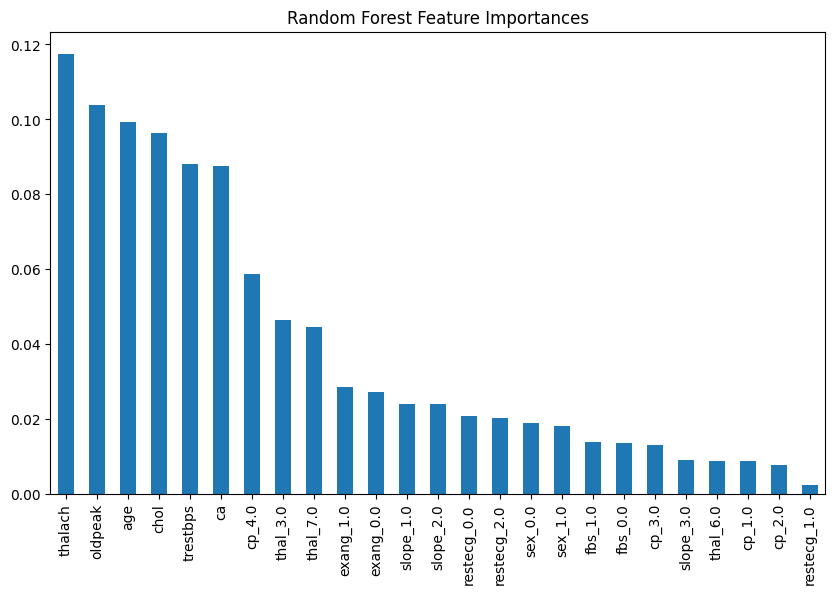

RFE ranking (1 = selected):
sex_0.0        1
ca             1
restecg_0.0    1
cp_4.0         1
thal_7.0       1
thal_3.0       1
slope_1.0      1
exang_0.0      1
dtype: int64
Top chi2 features:
thal_7.0     46.721875
cp_4.0       45.129615
exang_1.0    41.534482
thal_3.0     39.343661
ca           36.622292
slope_1.0    28.232230
slope_2.0    22.408432
cp_3.0       21.974965
exang_0.0    20.156440
cp_2.0       16.942450
dtype: float64
Selected features for modeling: ['thalach', 'oldpeak', 'age', 'chol', 'trestbps', 'ca', 'cp_4.0', 'thal_3.0', 'thal_7.0', 'exang_1.0']


c:\Users\MsterX\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\MsterX\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\MsterX\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is d

In [2]:
# 03_feature_selection.ipynb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler

CLEANED_PATH = "data/processed_cleaned.csv"
df = pd.read_csv(CLEANED_PATH)
X = df.drop(columns=['target'])
y = df['target']

# 1. Random Forest importance
rf = RandomForestClassifier(random_state=42, n_estimators=200)
rf.fit(X, y)
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
feat_imp.plot(kind='bar')
plt.title("Random Forest Feature Importances")
plt.show()

# 2. RFE with Logistic Regression as estimator (or RF)
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=log, n_features_to_select=8)  # choose 8 as example
rfe.fit(X, y)
rfe_ranking = pd.Series(rfe.ranking_, index=X.columns).sort_values()
print("RFE ranking (1 = selected):")
print(rfe_ranking[rfe_ranking==1])

# 3. Chi-square (requires non-negative features): scale to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
k = min(10, X.shape[1])
chi2_selector = SelectKBest(chi2, k=k)
chi2_selector.fit(X_scaled, y)
chi2_scores = pd.Series(chi2_selector.scores_, index=X.columns).sort_values(ascending=False)
print("Top chi2 features:")
print(chi2_scores.head(10))

# 4. Decide selected features (combine methods)
selected_features = list(feat_imp.head(10).index)  # example decision
print("Selected features for modeling:", selected_features)
